In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
cos = np.cos
sin = np.sin
sqrt = np.sqrt

# Topic 4. Molecular simulation

In [47]:
L = 1
Num = 200
Temp = 300
mass = 6.7e-27
kB = 1.38e-23
vth = np.sqrt(2*kB*Temp/mass)
tcollnt = 2*sqrt(2)*L/vth
NumCol = 100
delV = 0
Tn = 0

x = np.random.uniform(-L, L, Num)
y = np.random.uniform(-L, L, Num)
z = np.random.uniform(-L, L, Num)

phi = np.random.uniform(-pi, pi, Num)
theta = np.random.uniform(0, pi, Num)

Vx = vth*sin(theta)*cos(phi)
Vy = vth*sin(theta)*sin(phi)
Vz = vth*cos(phi)

tx = np.zeros(Num)
ty = np.zeros(Num)
tz = np.zeros(Num)
tc = np.zeros(NumCol)

pressure_after_n_collision = np.zeros(NumCol)

for n in range(NumCol):
    tcol = tcollnt
    for i in range(Num):
        tx[i] = abs((x[i]-L*np.sign(Vx[i]))/Vx[i])
        if tx[i] < tcol:
            tcol = tx[i].copy()
            mol = i
        ty[i] = abs((y[i]-L*np.sign(Vy[i]))/Vy[i])
        if ty[i] < tcol:
            tcol = ty[i].copy()
            mol = i
        tz[i] = abs((z[i]-L*np.sign(Vz[i]))/Vz[i])
        if tz[i] < tcol:
            tcol = tz[i].copy()
            mol = i
            
    # found smallest time needed for one collision to happen (regardless of direction)
    Tn += tcol
    tc[n] = Tn
    
    if tx[mol] <= ty[mol]:
        if tx[mol] <= tz[mol]:
            Vx[mol] = -Vx[mol]
            delV += 2*abs(Vx[mol])
        else:
            Vz[mol] = -Vz[mol]
            delV += 2*abs(Vz[mol])
    else:
        Vy[mol] = -Vy[mol]
        delV += 2*abs(Vy[mol])
    
    pressure_at_n = mass*delV/tcol
    x += Vx*tcol
    y += Vy*tcol
    z += Vz*tcol
    
    pressure_after_n_collision[n] = mass*delV/(8*L*Tn)
    print(pressure_at_n)

8.38732522443484e-19
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


/var/folders/z6/rm3bbyf1499dhyn1b2tcy4s80000gn/T/ipykernel_27851/1455068833.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  pressure_at_n = mass*delV/tcol


In [42]:
tc

array([8.59420148e-06, 9.94321925e-06, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
       1.10868080e-05, 1.10868080e-05, 1.10868080e-05, 1.10868080e-05,
      

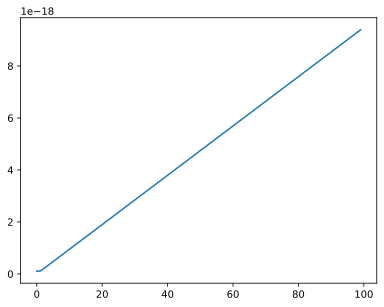

In [44]:
plt.plot(range(NumCol), pressure_after_n_collision)

In [27]:
pressure_after_n_collision

array([1.75997555e-19, 4.95562352e-19, 3.28042374e-19, ...,
       6.15729966e-18, 6.15849513e-18, 6.15969059e-18])

# Topic 5. Solving PDEs 

## 5.1. Heat equation (Convection-Diffusion with $U$=0)

In [117]:
def u_t0(x):
    return np.sin(np.pi*x)

In [120]:
def heat1d_solver_forward(a, b, dx, tmax, dt, kappa):
    '''
        1-dimensional heat equation solver
        ODE solver: forward Euler
        
        Args:
            u0: initial condition (for every x, at t=0)
            dx: discretization of space
            dt: discretization of time
            t_max: final time
            kappa: dissipation constant
            
        Returns:
            [u(t)]: numerical solution
    '''
    
    x = np.arange(a, b+dx, dx)
    nx = len(x)
    
    t = np.arange(0, tmax+dt, dt)
    nt = len(t)
    
    u = np.zeros((nx, nt)) # index 0 = time, index 1 = space
    
    # boundary condition
    u[0, :] = 0 
    u[-1, :] = 0
    
    # initial condition
    u[:, 0] = u_t0(x)
    
    gamma = dt/dx**2
    
    for j in range(1, nt): # loop from 1, since u(t=0) is given, toward the end
        for i in range(1, nx-1): # loop from 2 point to the previous point before last point 
            u[i][j] = gamma*u[i+1][j-1] + (1-2*gamma)*u[i][j-1] + gamma*u[i-1][j-1]
          
    return u

In [121]:
def heat1d_solver_backward(a, b, dx, tmax, dt, kappa):
    '''
        1-dimensional heat equation solver
        ODE solver: backward Euler
        
        Args:
            u0: initial condition (for every x, at t=0)
            dx: discretization of space
            dt: discretization of time
            t_max: final time
            kappa: dissipation constant
            
        Returns:
            [u(t)]: numerical solution
    '''

    x = np.arange(a, b+dx, dx)
    nx = len(x)

    t = np.arange(0, tmax+dt, dt)
    nt = len(t)

    u = np.zeros((nx, nt)) # index 0 = time, index 1 = space

    # boundary condition
    u[0, :] = 0
    u[-1, :] = 0

    # initial condition
    u[:, 0] = u_t0(x)

    gamma = dt/dx**2

    matA = np.diag((u.shape[0]-2)*[1+2*gamma], 0) + np.diag((u.shape[0]-3)*[-gamma], -1) + np.diag((u.shape[0]-3)*[-gamma], 1)

    for j in range(1, nt):
        b = u[1:-1, j-1].copy()
        b[0] = b[0] + gamma*u[0, j]
        b[-1] = b[-1] + gamma*u[-1, j]
        sol = np.linalg.solve(matA, b)
        u[1:-1, j] = sol
        
    return u

In [168]:
def heat_1d_cranknicol(a, b, dx, tmax, dt, kappa):
    '''
        1-dimensional heat equation solver
        ODE solver: Crank-Nicolson method, averaging second order derivative
        
        Args:
            u0: initial condition (for every x, at t=0)
            dx: discretization of space
            dt: discretization of time
            t_max: final time
            kappa: dissipation constant
            
        Returns:
            [u(t)]: numerical solution
    '''

    x = np.arange(a, b+dx, dx)
    nx = len(x)

    t = np.arange(0, tmax+dt, dt)
    nt = len(t)

    u = np.zeros((nx, nt)) # index 0 = time, index 1 = space

    # boundary condition
    u[0, :] = 0
    u[-1, :] = 0

    # initial condition
    u[:, 0] = u_t0(x)

    gamma = dt/dx**2

    matA = np.diag([2*(1+gamma)]*(u.shape[0]-2), 0) + np.diag([-gamma]*(u.shape[0]-3), -1) + np.diag([-gamma]*(u.shape[0]-3), 1)
    matB = np.diag([2*(1-gamma)]*(u.shape[0]-2), 0) + np.diag([gamma]*(u.shape[0]-3), -1) + np.diag([gamma]*(u.shape[0]-3), 1)

    for j in range(nt-1):
        b = u[1:-1, j].copy()
        b = np.dot(matB, b)
        b[0] = b[0] + gamma*(u[0, j]+u[0, j+1])
        b[-1] = b[-1] + gamma*(u[-1, j]+u[-1, j+1])
        solution = np.linalg.solve(matA, b)
        u[1:-1,j+1] = solution
        
    return u

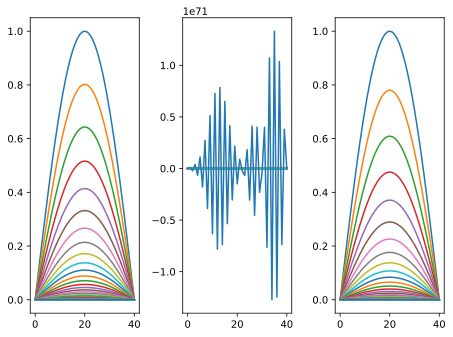

In [171]:
a = 0
b = 1
tmax = 1

dx = 0.025
dt = 0.025
kappa = 1.0

u_implicit = heat1d_solver_backward(a, b, dx, tmax, dt, kappa)
u_explicit = heat1d_solver_forward(a, b, dx, tmax, dt, kappa)
u_cranknicol = heat_1d_cranknicol(a, b, dx, tmax, dt, kappa)

fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].plot(u_implicit)
axes[1].plot(u_explicit)
axes[2].plot(u_cranknicol)
fig.tight_layout()